## Iris Classification

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

### Load data

In [2]:
iris_df = pd.read_csv('iris.csv')

In [3]:
#Make a copy of the dataframe for safety
df = iris_df.copy()

In [4]:
#Checking the head of the dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#Check the datatypes and some information about data using info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Getting the statistics about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Checking the species variable's unique values
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Missing Value Analysis

In [8]:
#Checking for nulls in the dataframe
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

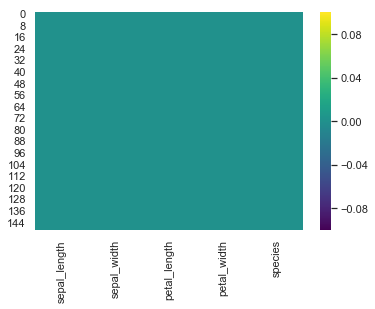

In [9]:
#Using heatmap, we can see whether there are missing values or not
sns.heatmap(df.isnull(), cmap='viridis')

In [10]:
#From the above graph, we can clearly see that there are no missing values

### Exploratory Data Analysis

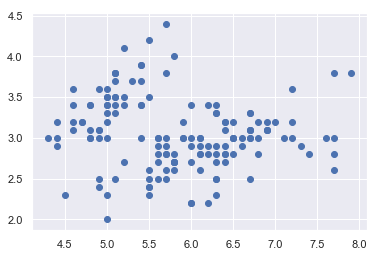

In [11]:
plt.scatter(x='sepal_length', y='sepal_width', data=df)

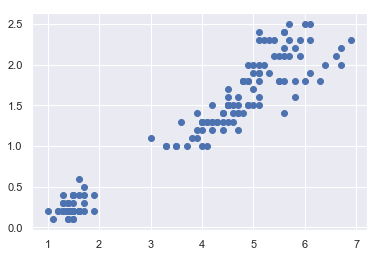

In [12]:
plt.scatter(x='petal_length', y='petal_width', data=df)

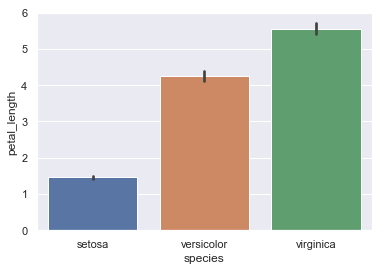

In [13]:
#Species vs Petal Length
sns.barplot(x='species', y='petal_length', data=df)

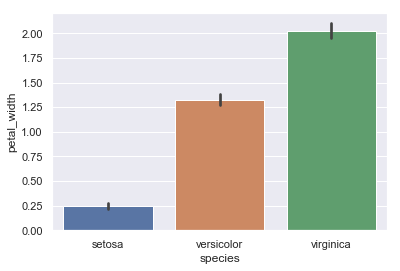

In [14]:
#Species vs Petal Width
sns.barplot(x='species', y='petal_width', data=df)

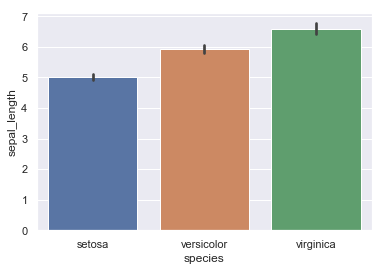

In [15]:
#Species vs Sepal Length
sns.barplot(x='species', y='sepal_length', data=df)

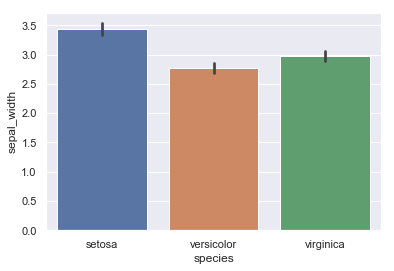

In [16]:
#Species vs Sepal Width
sns.barplot(x='species', y='sepal_width', data=df)

##### Based on the above plots, we can say that:
    1. If petal_length > 4.5 & petal_width > 1.5 and
          sepal_length > 6 & sepal_width > 2.7, that is 'Virginica'
    2. If petal_length < 2 & petal_width < 0.5 and
          sepal_length < 5.5 & sepal_width > 3.0, that is 'Setosa'
    3. If 2 < petal_length < 5 & 0.5 < petal_width < 1.5 and
          5 < sepal_length < 6 & sepal_width < 2.8, that is 'Versicolor'

### Model Building

In [17]:
#Input variables in X variable
X = df.drop('species', axis=1)

#Target variable in y variable
y = df['species']

In [18]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split

#Train data : 70% and Test data : 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)

In [19]:
#Checking the shape of the data
print('X_train:',X_train.shape)
print('X_test:', X_test.shape)
print("y_train:", y_train.shape)
print('y_test:', y_test.shape)

X_train: (105, 4)
X_test: (45, 4)
y_train: (105,)
y_test: (45,)


### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

#Creating an instance to the Logistic Regression
logreg = LogisticRegression()

In [21]:
#Fitting data on model
logreg.fit(X_train, y_train)

/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
#Making prediction
pred_lr = logreg.predict(X_test)

In [23]:
#Creating a dataframe which shows both the predicted value and true value
pred_true_df = pd.DataFrame({'True value': y_test, 'Predicted Value': pred_lr})

In [24]:
#Printing the dataframe which we have made
print(pred_true_df)

     True value Predicted Value
137   virginica       virginica
98   versicolor      versicolor
77   versicolor      versicolor
141   virginica       virginica
120   virginica       virginica
145   virginica       virginica
146   virginica       virginica
35       setosa          setosa
12       setosa          setosa
127   virginica       virginica
71   versicolor      versicolor
4        setosa          setosa
0        setosa          setosa
18       setosa          setosa
83   versicolor       virginica
6        setosa          setosa
7        setosa          setosa
9        setosa          setosa
103   virginica       virginica
81   versicolor      versicolor
42       setosa          setosa
108   virginica       virginica
57   versicolor      versicolor
68   versicolor      versicolor
30       setosa          setosa
104   virginica       virginica
105   virginica       virginica
63   versicolor      versicolor
73   versicolor      versicolor
53   versicolor      versicolor
112   vi

In [18]:
#For calculating Error Metrics
from sklearn import metrics

In [19]:
#Getting how much Accurately the model has predicted...
print('Accuracy of Logistic Regression model: {}'.format(metrics.accuracy_score(y_test, pred_lr)*100))

Accuracy of Logistic Regression model: 95.55555555555556


Findings/Observations:

1. Setosa species features are not similar to either Versi-color or Virginica

2. Versi-color and Virginica features are overlapped as they are somewhat similar

3. Setosa is having very less petal_length and petal_width than other 2 species

4. Virginica is having very high petal_length and petal_width than other 2 species